**Exercise1.pdf**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

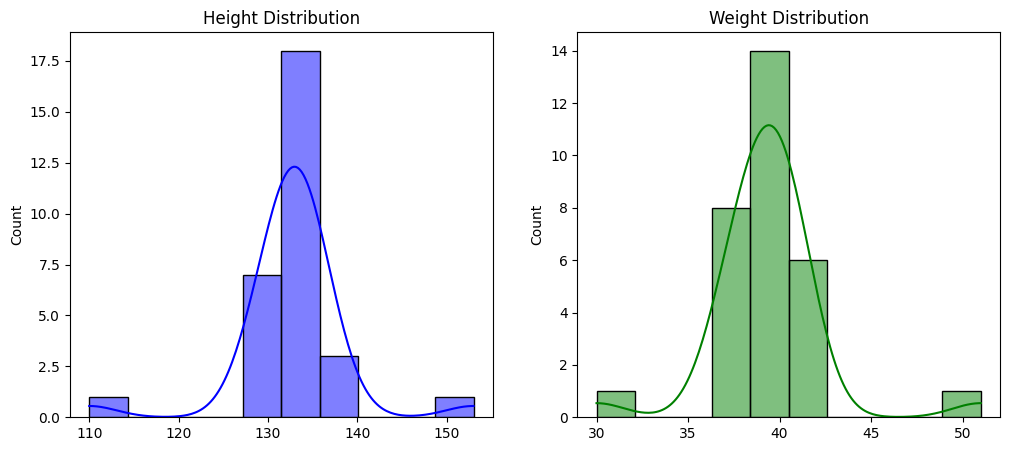

In [2]:
# Bài tập 1: Phân tích dữ liệu chiều cao và cân nặng
heights = [130, 132, 138, 153, 133, 110, 132, 129, 135, 134, 136, 133, 133, 134, 135,
           132, 135, 134, 133, 132, 130, 131, 135, 134, 136, 133, 133, 130, 129, 128]
weights = [37, 40, 39, 51, 41, 30, 39, 38, 41, 37, 39, 38, 37, 40, 41,
           40, 37, 39, 40, 41, 38, 39, 40, 41, 39, 40, 40, 38, 39, 41]

# Vẽ phân bố dữ liệu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(heights, bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Height Distribution')
sns.histplot(weights, bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Weight Distribution')
plt.show()

In [12]:
# Tính toán các tham số thống kê
def descriptive_stats(data):
    # Calculate the mode using stats.mode
    mode_result = stats.mode(data)
    # Access the mode value directly from the ModeResult object
    mode_value = mode_result.mode

    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": mode_value,  # Use the extracted mode value
        "Standard Deviation": np.std(data),
        "Variance": np.var(data),
        "Range": max(data) - min(data)
    }

height_stats = descriptive_stats(heights)
weight_stats = descriptive_stats(weights)

print("Height Stats:", height_stats)
print("Weight Stats:", weight_stats)

# Kiểm tra tương quan giữa chiều cao và cân nặng
correlation, _ = stats.pearsonr(heights, weights)
print("Correlation between height and weight:", correlation)

# Định lượng mức độ tương quan
if abs(correlation) > 0.7:
    correlation_strength = "strong"
elif abs(correlation) > 0.3:
    correlation_strength = "moderate"
else:
    correlation_strength = "weak"
print(f"The correlation is {correlation_strength}.")


Height Stats: {'Mean': np.float64(132.73333333333332), 'Median': np.float64(133.0), 'Mode': np.int64(133), 'Standard Deviation': np.float64(6.005182946607223), 'Variance': np.float64(36.06222222222222), 'Range': 43}
Weight Stats: {'Mean': np.float64(39.333333333333336), 'Median': np.float64(39.0), 'Mode': np.int64(39), 'Standard Deviation': np.float64(3.01477841455867), 'Variance': np.float64(9.088888888888887), 'Range': 21}
Correlation between height and weight: 0.8444895594942148
The correlation is strong.


In [11]:
# Kết luận về phân bố dữ liệu
height_skewness = stats.skew(heights)
weight_skewness = stats.skew(weights)

if height_skewness > 0:
    height_shape = "right-skewed (positive skew)"
elif height_skewness < 0:
    height_shape = "left-skewed (negative skew)"
else:
    height_shape = "approximately symmetric"

if weight_skewness > 0:
    weight_shape = "right-skewed (positive skew)"
elif weight_skewness < 0:
    weight_shape = "left-skewed (negative skew)"
else:
    weight_shape = "approximately symmetric"

print(f"Conclusion about height distribution: The height data is {height_shape}.")
print(f"Conclusion about weight distribution: The weight data is {weight_shape}.")

Conclusion about height distribution: The height data is left-skewed (negative skew).
Conclusion about weight distribution: The weight data is right-skewed (positive skew).


**Exercise2.pdf**

In [15]:
pd.set_option('future.no_silent_downcasting', True)

# Bài tập 2: Làm sạch dữ liệu nhân sự
employee_data = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Mary', 'Alice', 'Shara', 'Peter'],
    'Sex': ['Male', 'Female', 'Female', 'Femal', 'Male'],
    'Age': [24, np.nan, 49, 32, 21],
    'Qualification': ['College', 'Bachelor', 'College', 'Master', 'Bachelor']
})

# Sửa lỗi chính tả và chuẩn hóa cột giới tính
employee_data['Sex'] = employee_data['Sex'].replace({'Male': 1, 'Female': 0, 'Femal': 0}).astype(int)

# Điền giá trị thiếu trong cột tuổi bằng giá trị trung bình của nhìeeu nhân viên
employee_data['Age'] = employee_data['Age'].fillna(employee_data['Age'].mean())

# Mã hóa trình độ học vấn thành số
qualification_map = {'College': 0, 'Bachelor': 1, 'Master': 2}
employee_data['Qualification'] = employee_data['Qualification'].map(qualification_map)

print("Cleaned Employee Data:\n", employee_data)

Cleaned Employee Data:
    EmployeeID   Name  Sex   Age  Qualification
0           1   John    1  24.0              0
1           2   Mary    0  31.5              1
2           3  Alice    0  49.0              0
3           4  Shara    0  32.0              2
4           5  Peter    1  21.0              1


Detected Height Outliers: [153, 110]
Detected Weight Outliers: [51, 30]


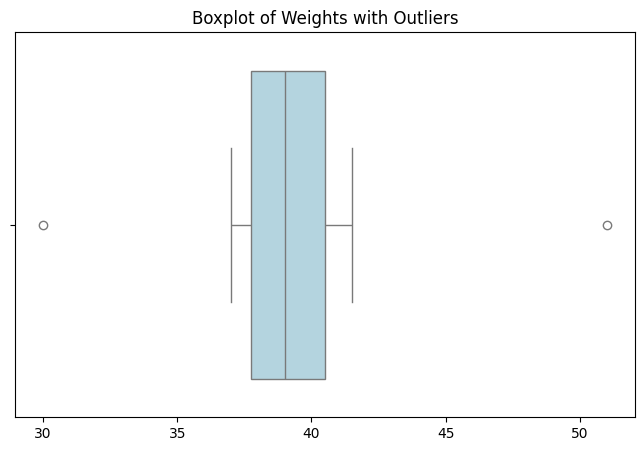

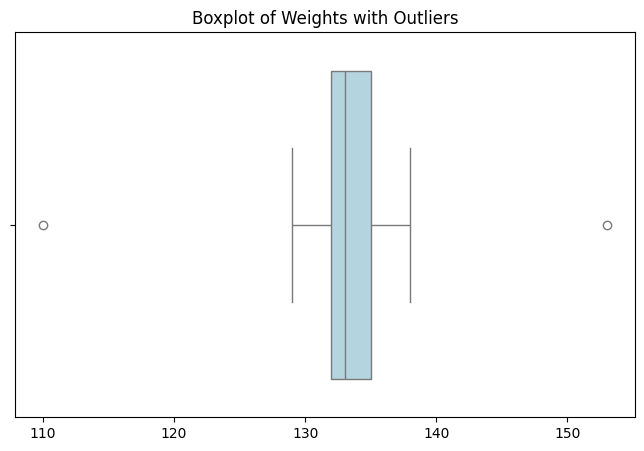

In [19]:
import numpy as np
import pandas as pd

# Dữ liệu đầu vào
heights = [130, 132, 138, 153, 133, 110, 132, 129, 135, 134, 136, 133, 133, 134, 135]
weights = [37, 40, 39, 51, 41, 30, 39.5, 38.5, 41.5, 37, 39, 38.5, 37, 40, 41]

# Hàm phát hiện ngoại lai bằng IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if x < lower_bound or x > upper_bound]

# Áp dụng phát hiện ngoại lai
height_outliers = detect_outliers_iqr(heights)
weight_outliers = detect_outliers_iqr(weights)

# Kết quả
print("Detected Height Outliers:", height_outliers)
print("Detected Weight Outliers:", weight_outliers)

plt.figure(figsize=(8, 5))
sns.boxplot(x=weights, color='lightblue')
plt.title("Boxplot of Weights with Outliers")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x=heights, color='lightblue')
plt.title("Boxplot of Weights with Outliers")
plt.show()
